In [ ]:
import math
import numpy
import matplotlib.pyplot
import pandas
from scipy import stats

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import classification_report

In [ ]:
def model_lif0(dt, i_cur, duration):

  dt = dt
  synp_cur = i_cur
  T = duration
  tm = 0.02
  R = 3e7
  rest_V = -0.07
  V_0 = 0.3
  I_0 = V_0/R

  synp_cur_n = len(synp_cur)
  synp_cur_idx = [round(s/dt) for s in synp_cur]
  stp_cou = round(T/dt)
  V = [0 for v in range(stp_cou+1)]
  V_plot = [0 for v in range(stp_cou+1)]


  V[0] = rest_V
  V_plot[0] = rest_V
  I = [0 for _ in range(stp_cou+1)]
  time = numpy.linspace(0,T,num=stp_cou+1)

  for c in range(stp_cou):
    for s in range(synp_cur_n):
      if c == synp_cur_idx[s]:
        I[c] +=I_0
    dV =(dt/tm)*(rest_V-V[c]+I[c]*R)
    V[c+1] = V[c] + dV
    V_plot[c+1]=V[c+1]

  graph = matplotlib.pyplot.figure()
  matplotlib.pyplot.plot(time, V_plot)
  matplotlib.pyplot.title('Membrane equation model')
  matplotlib.pyplot.xlabel("time (s)")
  matplotlib.pyplot.ylabel("voltage (V)")
  matplotlib.pyplot.grid()
  matplotlib.pyplot.show()

In [ ]:
dt = 0.0001
synp_cur = numpy.arange(0.06, dt+0.07, dt)
T = 0.2

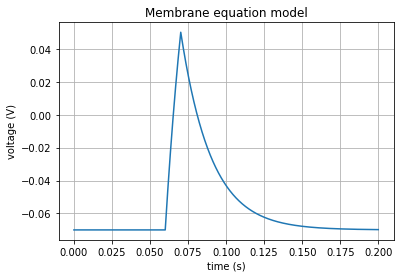

In [ ]:
model_lif0(dt, synp_cur, T)

In [ ]:
def model_lif1(dt, i_cur, duration):

  dt = dt
  synp_cur = i_cur
  T = duration
  tm = 0.02
  R = 3e7
  rest_V = -0.07
  V_0 = 0.3
  I_0 = V_0/R

  tresh = -0.03
  V_spike = 0.1

  synp_cur_n = len(synp_cur)
  synp_cur_idx = [round(s/dt) for s in synp_cur]
  stp_cou = round(T/dt)
  V = [0 for v in range(stp_cou+1)]
  V_plot = [0 for v in range(stp_cou+1)]
  V[0] = rest_V
  V_plot[0] = rest_V
  I = [0 for i in range(stp_cou+1)]
  spikes_n = 0
  time = numpy.linspace(0,T,num=stp_cou+1)

  for c in range(stp_cou):
    for s in range(synp_cur_n):
      if c == synp_cur_idx[s]:
        I[c] +=I_0
    dV =(dt/tm)*(rest_V-V[c]+I[c]*R)
    V[c+1] = V[c] + dV
    V_plot[c+1]=V[c+1]

    if (V[c+1] > tresh):
      V_plot[c+1] = V_spike
      V[c+1] = rest_V
      spikes_n += spikes_n + 1

  graph = matplotlib.pyplot.figure()
  matplotlib.pyplot.plot(time, V_plot)
  matplotlib.pyplot.hlines(y=tresh, xmin=0, xmax=T)
  matplotlib.pyplot.title("Leaky integrate-and-fire model. Threshold: " + str(tresh*1000) + "mV")
  matplotlib.pyplot.xlabel("time (s)")
  matplotlib.pyplot.ylabel("voltage (U), number of spikes: " + str(spikes_n))
  matplotlib.pyplot.grid()
  matplotlib.pyplot.show()

In [ ]:
dt = 0.0001
synp_cur = numpy.arange(0.06, dt+0.065, dt)
T = 0.2

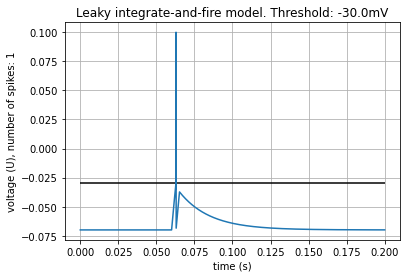

In [ ]:
model_lif1(dt, synp_cur, T)

In [ ]:
def model_lif2(dt, i_cur, duration):

  dt = dt
  synp_cur = i_cur
  T = duration
  tm = 0.02
  R = 3e7
  rest_V = -0.07
  V_0 = 0.3
  I_0 = V_0/R


  tresh = -0.03
  V_spike = 0.1



  refr_p = 0.006

  noise = 3e-9



  synp_cur_n = len(synp_cur)
  synp_cur_idx = [round(s/dt) for s in synp_cur]
  stp_cou = round(T/dt)
  V = [0 for v in range(stp_cou+1)]
  V_plot = [0 for v in range(stp_cou+1)]
  V[0] = rest_V
  V_plot[0] = rest_V
  I = [0 for i in range(stp_cou+1)]

  spike_t = 0

  spikes_n = 0
  time = numpy.linspace(0,T,num=stp_cou+1)

  rnd_noise = [noise*i for i in numpy.random.normal(0,1, int(stp_cou))]

  for c in range(stp_cou):
    for s in range(synp_cur_n):
      if c == synp_cur_idx[s]:
        I[c] +=I_0

    dV =(dt/tm)*((rest_V-V[c])+((I[c] + rnd_noise[c])*R ))
    V[c+1] = V[c] + dV
    V_plot[c+1]=V[c+1]


    if (V[c+1] > tresh):
      if (spikes_n>0):
        if (time[c]>=(spike_t+refr_p)):
          V_plot[c+1] = V_spike
          V[c+1] = rest_V
          spike_t = time[c]
          spikes_n = spikes_n + 1

        else:
          V[c+1] = V[c];
          V_plot[c+1]=V[c+1];

      else:
        V_plot[c+1]=V_spike;
        V[c+1] = rest_V;
        spike_t = time[c];
        spikes_n = spikes_n+1;


  graph = matplotlib.pyplot.figure()
  matplotlib.pyplot.plot(time, V_plot)
  matplotlib.pyplot.hlines(y=tresh, xmin=0, xmax=T)
  title_1 = "Leaky I&F model with background current and refractory period."
  title_2 = "Threshold: " + str(tresh*1000) + " mV. Refractory period " + str(1000*refr_p) + " ms"
  matplotlib.pyplot.title({title_1 + title_2})
  matplotlib.pyplot.xlabel("time (s)")
  matplotlib.pyplot.ylabel("voltage (U), number of spikes: " + str(spikes_n))
  matplotlib.pyplot.grid()
  matplotlib.pyplot.show()

In [ ]:
dt = 0.0001
synp_cur = numpy.arange(0.05, dt+0.055, dt)
T = 0.2

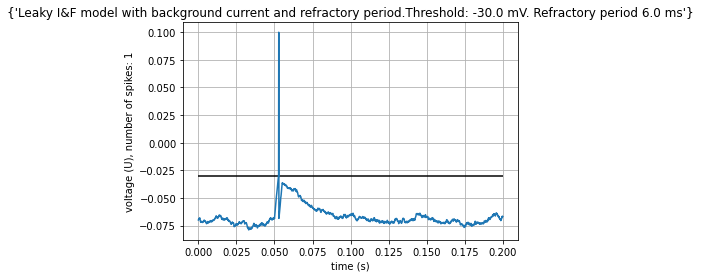

In [ ]:
model_lif2(dt, synp_cur, T)

In [ ]:
def model_lif3(dt, i_cur, duration, show_graph = False, show_theta_adapt = False):

  dt = dt
  synp_cur = i_cur
  T = duration

  tm = 0.02
  R = 3e7
  rest_V = -0.07
  V_0 = 0.3
  I_0 = V_0/R

  tresh = -0.03

  V_spike=0.1



  refr_p = 0.006

  noise = 3e-9


  tm_adapt = 0.15
  increase_threshold = 0.012




  synp_cur_n = len(synp_cur)


  synp_cur_idx = [round(s/dt) for s in synp_cur]


  stp_cou = round(T/dt)
  V = [0 for v in range(stp_cou+1)]
  V_plot = [0 for v in range(stp_cou+1)]
  V[0] = rest_V
  V_plot[0] = rest_V
  I = [0 for i in range(stp_cou+1)]

  spike_t = 0

  spikes_n = 0
  time = numpy.linspace(0,T,num=stp_cou+1)

  rnd_noise = [noise*i for i in numpy.random.normal(0,1, int(stp_cou))]


  theta_adapt= [tresh for _ in range(stp_cou + 1)]

  for c in range(stp_cou):
    for s in range(synp_cur_n):
      if c == synp_cur_idx[s]:
        I[c] +=I_0

    dV =(dt/tm)*((rest_V-V[c])+((I[c] + rnd_noise[c])*R ))
    V[c+1] = V[c] + dV
    V_plot[c+1]=V[c+1]

    if (V[c+1] > theta_adapt[c]):
      if (spikes_n>0):
        if (time[c]>=(spike_t+refr_p)):
          V_plot[c+1] = V_spike
          V[c+1] = rest_V
          spike_t = time[c]
          spikes_n = spikes_n + 1

          theta_adapt[c+1]=theta_adapt[c]+increase_threshold;

        else:
          V[c+1] = V[c];
          V_plot[c+1]=V[c+1];
          theta_adapt[c+1] = theta_adapt[c]+(dt/tm_adapt)*(tresh-theta_adapt[c]);


      else:
        V_plot[c+1]=V_spike;
        V[c+1] = rest_V;
        spike_t = time[c];
        spikes_n = spikes_n+1;

        theta_adapt[c+1]=theta_adapt[c]+increase_threshold

    else:
      theta_adapt[c+1] = theta_adapt[c]+(dt/tm_adapt)*(tresh-theta_adapt[c])

  if (show_graph):
    graph = matplotlib.pyplot.figure()
    graph.set_figwidth(15)
    matplotlib.pyplot.plot(time, V_plot)
    matplotlib.pyplot.hlines(y=tresh, xmin=0, xmax=T)
    title_1 = "Leaky I&F with background current, refractory period, excit/inhib synapses"
    title_2 = " and adaptive threshold. Rest value: " + str(tresh*1000) + " mV. Refractory period " + str(1000*refr_p) + " ms"
    matplotlib.pyplot.title({title_1 + title_2})
    matplotlib.pyplot.xlabel("time (s)")
    matplotlib.pyplot.ylabel("voltage (U), number of spikes: " + str(spikes_n))
    matplotlib.pyplot.grid()
    matplotlib.pyplot.show()

  if (show_theta_adapt):
    graph2 = matplotlib.pyplot.figure()
    matplotlib.pyplot.plot(time, theta_adapt)
    matplotlib.pyplot.title(f"Threshold {1000 * tresh} mV. Refactory period {1000 * refr_p} ms")
    matplotlib.pyplot.xlabel("time (s)")
    matplotlib.pyplot.ylabel("Spike threshold (U), number of spikes=" + str(spikes_n))
    matplotlib.pyplot.grid()
    matplotlib.pyplot.show()

  return V_plot

In [ ]:
dt = 0.0001
synp_cur = numpy.arange(0.06, dt+0.065, dt)
T = 0.2

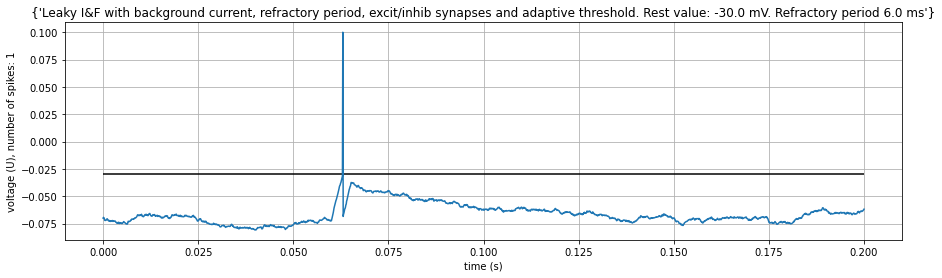

[-0.07,
 -0.06928856025147274,
 -0.07018117372727366,
 -0.0701446143651956,
 -0.07185289080229587,
 -0.07213967610356767,
 -0.07210875766985998,
 -0.0718821388757525,
 -0.0716462521465317,
 -0.07168811780634303,
 -0.07065619049652476,
 -0.07065471711893526,
 -0.07145770720170455,
 -0.07184458313648062,
 -0.07230583191145996,
 -0.07200004925155092,
 -0.07269646145228327,
 -0.0722374058680155,
 -0.07277245966920867,
 -0.07302213427448673,
 -0.07233278724423323,
 -0.07282882731964511,
 -0.07251389831881469,
 -0.072332281790651,
 -0.07227585358146754,
 -0.07220589615448697,
 -0.07301060808645175,
 -0.07278178074447696,
 -0.07281405794082857,
 -0.07262456332476047,
 -0.07264783820530295,
 -0.07251287847091334,
 -0.07288233487220683,
 -0.0735771916215848,
 -0.07391254498392627,
 -0.07413042899370266,
 -0.07395931681600464,
 -0.07462867377245172,
 -0.07406039723368686,
 -0.07428582248204438,
 -0.07477904282269834,
 -0.07368841630073127,
 -0.07472880822775609,
 -0.0749157764090157,
 -0.0743285

In [ ]:
model_lif3(dt, synp_cur, T, show_graph = True, show_theta_adapt = False)

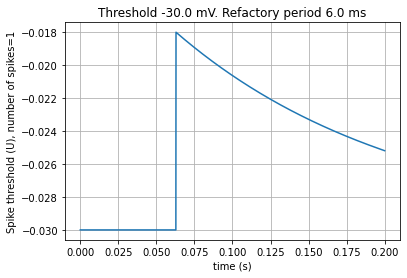

[-0.07,
 -0.06961758015509795,
 -0.07021944897354734,
 -0.0698968132239786,
 -0.06926829597799555,
 -0.06872067693183952,
 -0.0689695652274065,
 -0.06930717929579082,
 -0.06980777553719976,
 -0.07004217072169193,
 -0.07013590850274652,
 -0.070949504912784,
 -0.0714520743670794,
 -0.07143001822376958,
 -0.0711102158395252,
 -0.0702889669834875,
 -0.07104915733206216,
 -0.07117133741482985,
 -0.07159422334571991,
 -0.0715698665362054,
 -0.07217139278462854,
 -0.0721456039819617,
 -0.07150280240760605,
 -0.07232393581935809,
 -0.07197893291898903,
 -0.07277358305211097,
 -0.07288155274958809,
 -0.07340295350509697,
 -0.0732701517981007,
 -0.07331388080219144,
 -0.07359614091181825,
 -0.07443402621594962,
 -0.07382653266498121,
 -0.073494108850561,
 -0.07334286917685391,
 -0.0731540008616375,
 -0.07322919921586796,
 -0.07283121225381302,
 -0.0729045976252594,
 -0.07188834685667907,
 -0.07151974192155644,
 -0.07173637974989215,
 -0.07189923567219711,
 -0.07251996978900165,
 -0.0724223351094

In [ ]:
model_lif3(dt, synp_cur, T, show_graph = False, show_theta_adapt = True)

In [ ]:
dt = 0.0001
T = 5

In [ ]:
datasetsdefin = pandas.read_csv("/content/DataSetCoursework_AKP_AND.txt",
                         sep="  ",
                         names=["first", "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth"])

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
def arti(getvalues, values, name ,dt, T):

  getvalues = getvalues
  values = values
  name = name
  dt = dt
  T = T

  print(name)

  for i in getvalues:
    for k in range(100):
      values.append((i/1000 - ((100-k)*dt)))
  neu = model_lif3(dt, values, T, show_graph = True, show_theta_adapt = False)

  return neu

computationally generated spikes of neuron 1 first trial


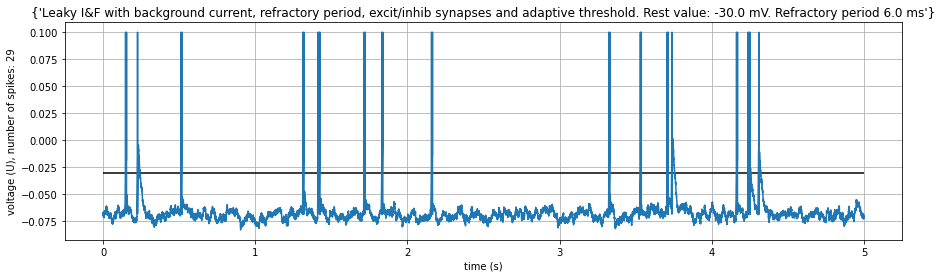

In [ ]:
getvalues = datasetsdefin[datasetsdefin["first"] == 1].index.values
val_1 = []
name = "computationally generated spikes of neuron 1 first trial"
dt = 0.0001
T = 5

a_sr_1 = arti(getvalues, val_1, name,dt, T)

computationally generated spikes of neuron 2


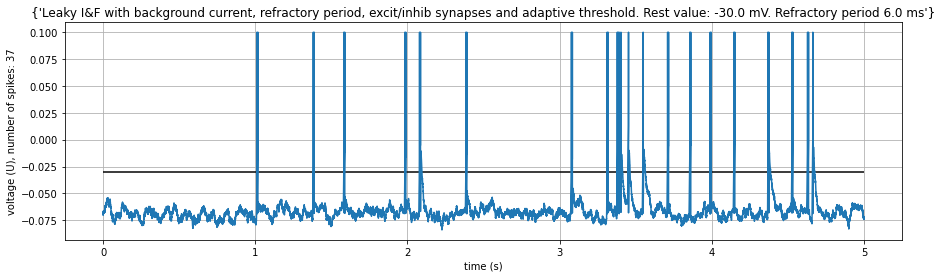

In [ ]:
getvalues = datasetsdefin[datasetsdefin["second"] == 1].index.values
val_2 = []
name = "computationally generated spikes of neuron 2"
dt = 0.0001
T = 5

a_sr_2 = arti(getvalues, val_2, name,dt, T)

computationally generated spikes of neuron 3


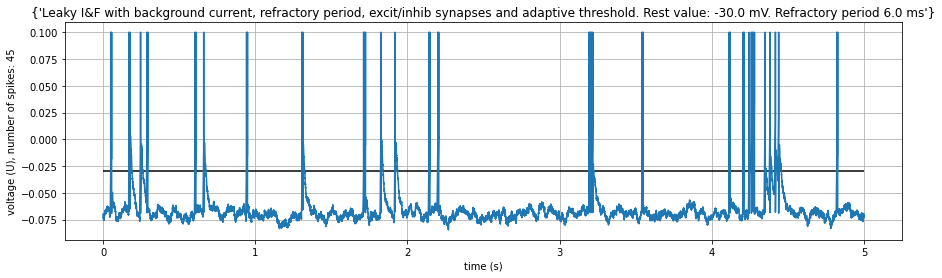

In [ ]:
getvalues = datasetsdefin[datasetsdefin["third"] == 1].index.values
val_3 = []
name = "computationally generated spikes of neuron 3"
dt = 0.0001
T = 5

a_sr_3 = arti(getvalues, val_3, name,dt, T)

computationally generated spikes of neuron 4


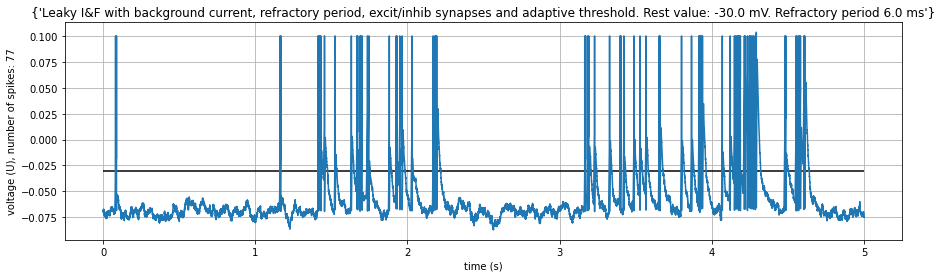

In [ ]:
getvalues = datasetsdefin[datasetsdefin["fourth"] == 1].index.values
val_4 = []
name = "computationally generated spikes of neuron 4"
dt = 0.0001
T = 5

a_sr_4 = arti(getvalues, val_4, name,dt, T)

computationally generated spikes of neuron 5


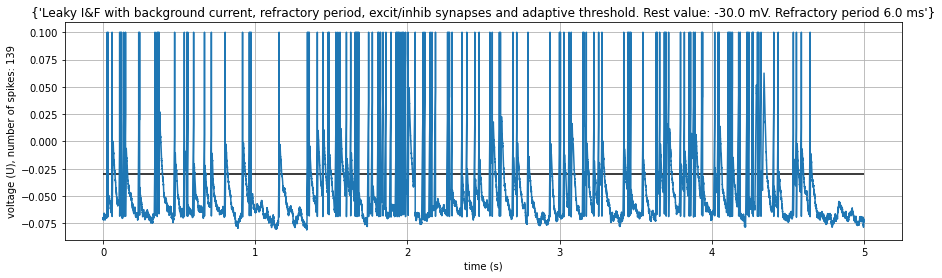

In [ ]:
getvalues = datasetsdefin[datasetsdefin["fifth"] == 1].index.values
val_5 = []
name = "computationally generated spikes of neuron 5"
dt = 0.0001
T = 5

a_sr_5 = arti(getvalues, val_5, name,dt, T)

computationally generated spikes of neuron 6


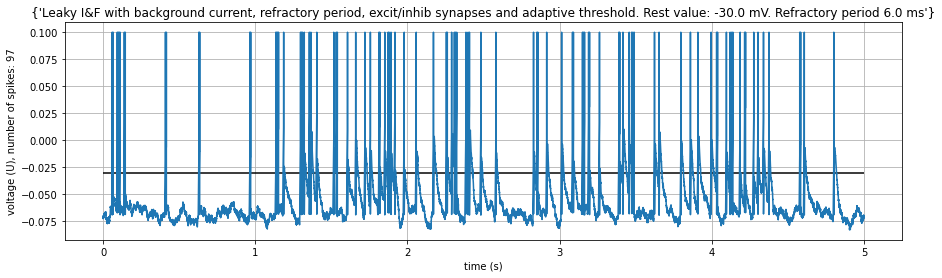

In [ ]:
getvalues = datasetsdefin[datasetsdefin["sixth"] == 1].index.values
val_6 = []
name = "computationally generated spikes of neuron 6"
dt = 0.0001
T = 5

a_sr_6 = arti(getvalues, val_6, name,dt, T)

In [ ]:
def realspi(Spikes, window_size, bin_size, show_plot = False):
  Spikes = Spikes
  window_size = window_size
  bin_size = bin_size

  trial_number = Spikes.iloc[:, -1]
  classes = Spikes.iloc[:, -2]
  spikes = Spikes.iloc[:, :-2]
  n, m = spikes.shape
  times = [t*bin_size for t in range(n)]
  window_step = int(window_size/bin_size)
  rate = numpy.zeros((n, m), dtype=int)

  for i in range(m):
    print(f"Real spikes of neuron {i+1}")
    graph = matplotlib.pyplot.figure()
    graph.set_figwidth(15)
    matplotlib.pyplot.plot(times, spikes.iloc[:,i])
    matplotlib.pyplot.xlabel('time(s)')
    matplotlib.pyplot.ylabel('Spikes')
    matplotlib.pyplot.grid()
    matplotlib.pyplot.show()

Real spikes of neuron 1


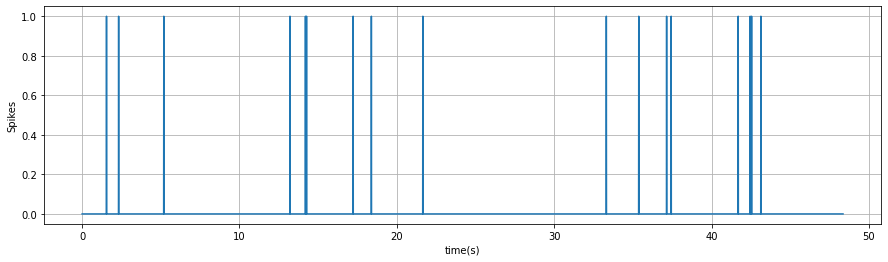

Real spikes of neuron 2


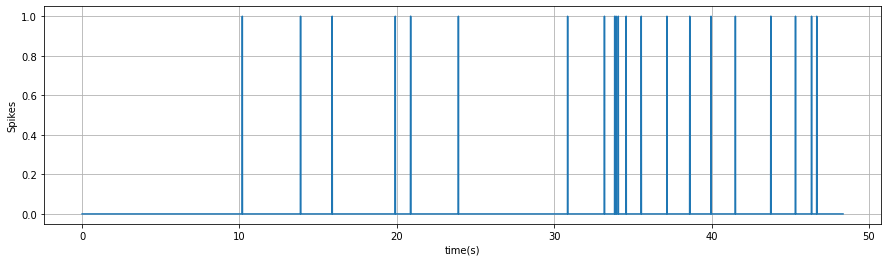

Real spikes of neuron 3


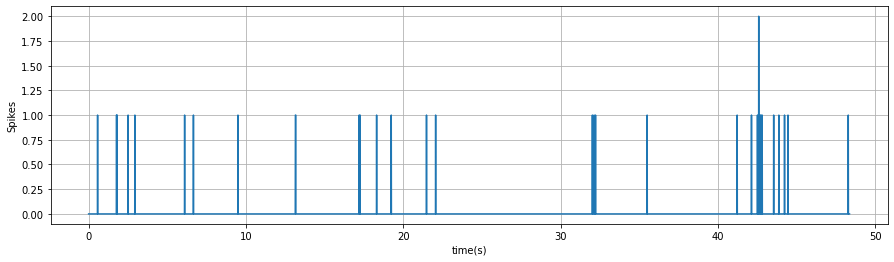

Real spikes of neuron 4


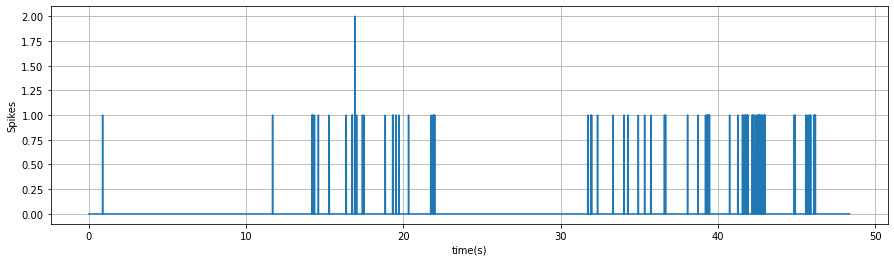

Real spikes of neuron 5


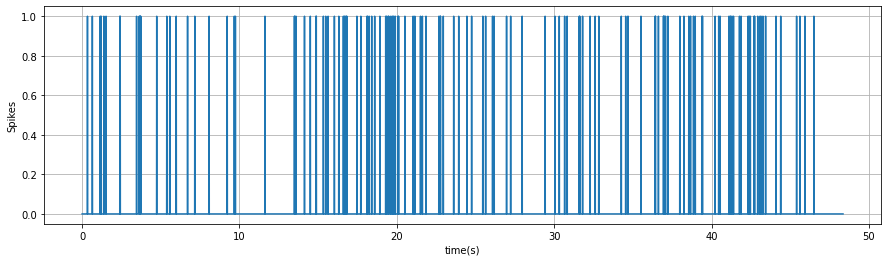

Real spikes of neuron 6


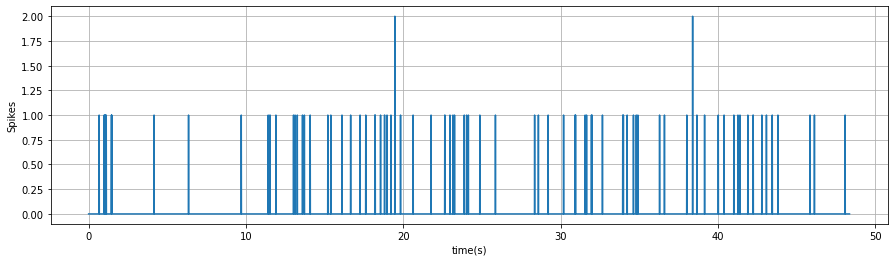

In [ ]:
window_size = 0.2
bin_size = 0.01

realspi(datasetsdefin, window_size, bin_size, show_plot =True)

In [ ]:
def artificial_r(Spikes, window_size, bin_size, neuron):
  Spikes = Spikes
  window_size = window_size
  bin_size = bin_size

  n = len(Spikes)
  times = [t*bin_size for t in range(n)]
  window_step = int(window_size/bin_size)
  rate = numpy.zeros((n), dtype=int)

  smoothed = []
  for i in range(n-window_step + 1):
    smoothed.append((sum(Spikes[i:i +window_step -1]))*(1 / window_size))
  for _ in range(window_step - 1):
    smoothed.append(smoothed[-1])
  rate[:] = smoothed

  graph = matplotlib.pyplot.figure()
  graph.set_figwidth(15)
  matplotlib.pyplot.plot(times,rate[:])
  matplotlib.pyplot.title(f"artificial rate of {neuron} ")
  matplotlib.pyplot.xlabel('time(s)')
  matplotlib.pyplot.ylabel('Spikes/sec')
  matplotlib.pyplot.grid()
  matplotlib.pyplot.show()
  corr = stats.pearsonr(rate[:],Spikes[:])
  print(f"Correlation: {corr[0]} ")

In [ ]:
a_ws = 0.2
a_bs = 0.001

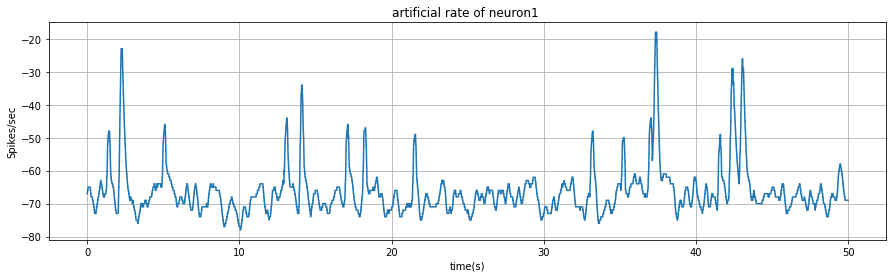

Correlation: 0.6427199538932418 


In [ ]:
artificial_r(a_sr_1, a_ws, a_bs, 'neuron1')

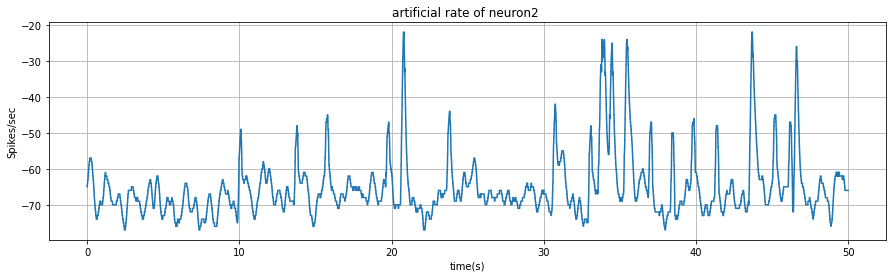

Correlation: 0.6314542182292717 


In [ ]:
artificial_r(a_sr_2, a_ws, a_bs, 'neuron2')

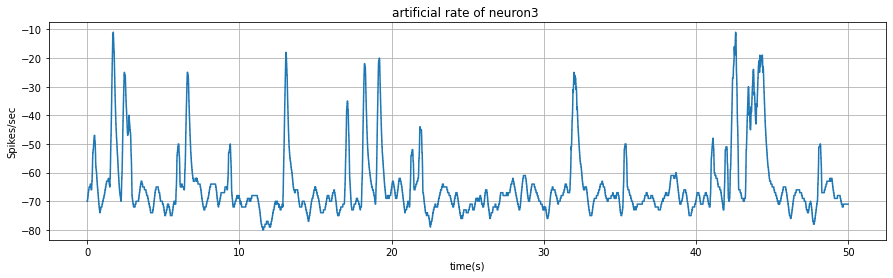

Correlation: 0.6976145717099678 


In [ ]:
artificial_r(a_sr_3, a_ws, a_bs, 'neuron3')

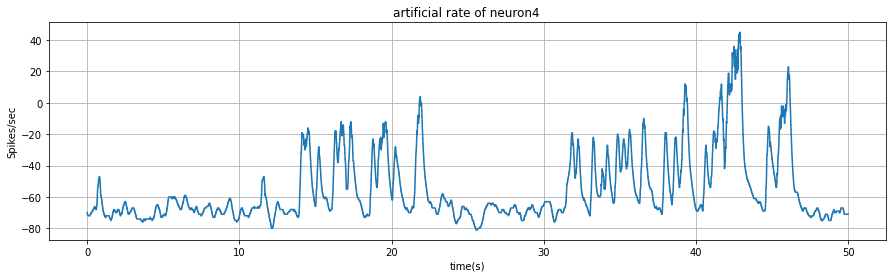

Correlation: 0.8124203963391988 


In [ ]:
artificial_r(a_sr_4, a_ws, a_bs, 'neuron4')

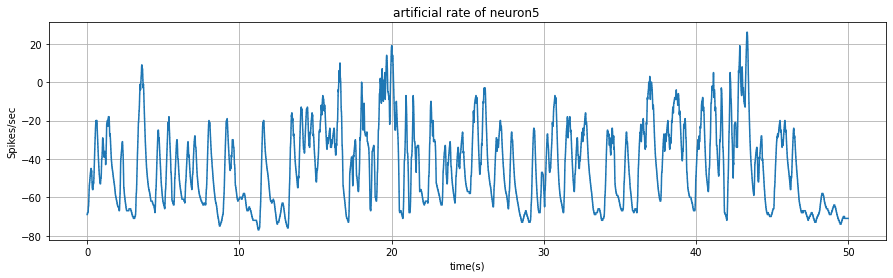

Correlation: 0.6182019279103241 


In [ ]:
artificial_r(a_sr_5, a_ws, a_bs, 'neuron5')

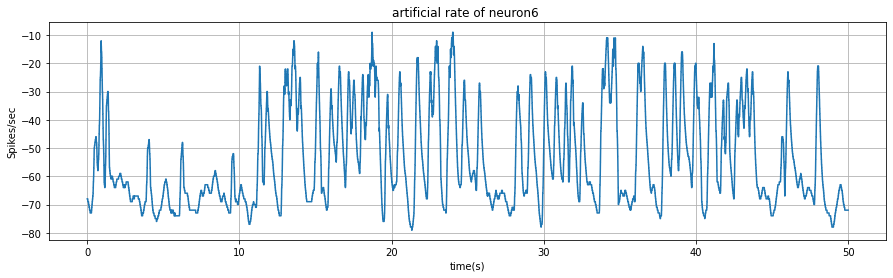

Correlation: 0.6571900880577388 


In [ ]:
artificial_r(a_sr_6, a_ws, a_bs, 'neuron6')

In [ ]:
def Rates1(Spikes, window_size, bin_size, show_plot = False):
  Spikes = Spikes
  window_size = window_size
  bin_size = bin_size

  trial_number = Spikes.iloc[:, -1]
  classes = Spikes.iloc[:, -2]
  spikes = Spikes.iloc[:, :-2]
  n, m = spikes.shape
  times = [t*bin_size for t in range(n)]
  window_step = int(window_size/bin_size)
  rate = numpy.zeros((n, m), dtype=int)

  for neuron_number in range(m):
    smoothed = []
    for i in range(n-window_step + 1):
      smoothed.append((sum(spikes.iloc[i:i +window_step -1, neuron_number]))*(1 / window_size))
    for _ in range(window_step - 1):
      smoothed.append(smoothed[-1])
    rate[:,neuron_number] = smoothed

  if (show_plot):
    for i in range(m):
      graph = matplotlib.pyplot.figure()
      graph.set_figwidth(15)
      matplotlib.pyplot.plot(times,rate[:,i])
      matplotlib.pyplot.title(f"real rate of neuron {i+1} ")
      matplotlib.pyplot.xlabel('time(s)')
      matplotlib.pyplot.ylabel('Spikes/sec')
      matplotlib.pyplot.grid()
      matplotlib.pyplot.show()
      corr = stats.pearsonr(rate[:,i], spikes.iloc[:,i])
      print(f"Correlation Number: {corr[0]}")

  return (rate, classes)

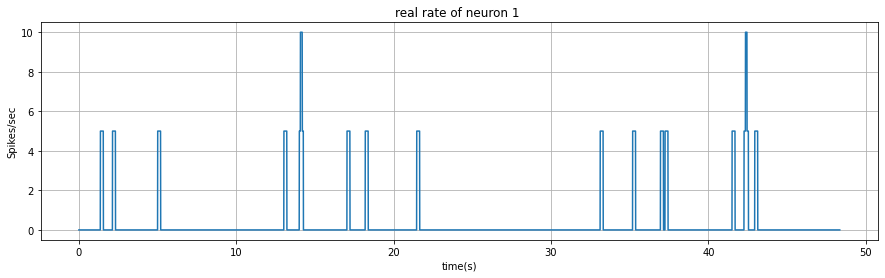

Correlation Number: 0.23353641073055584


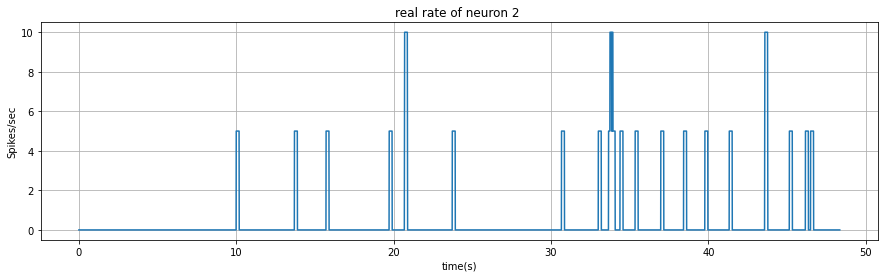

Correlation Number: 0.23306401346208333


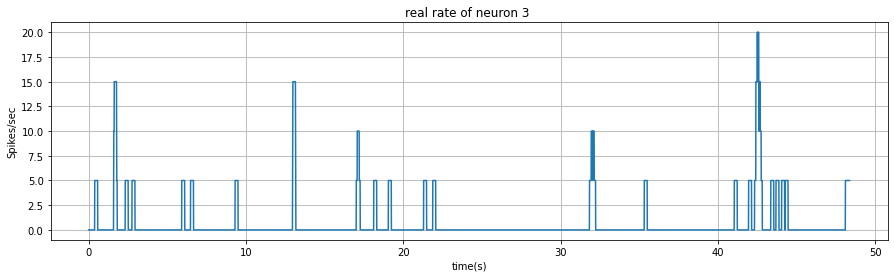

Correlation Number: 0.26037640899393777


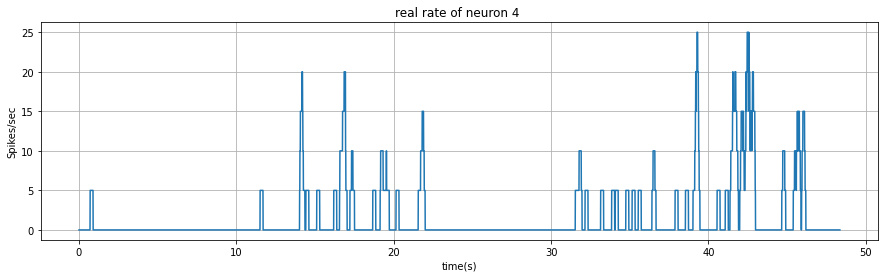

Correlation Number: 0.308074033603021


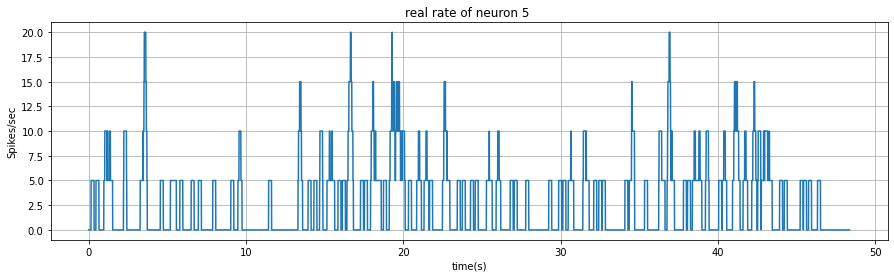

Correlation Number: 0.24447517209577227


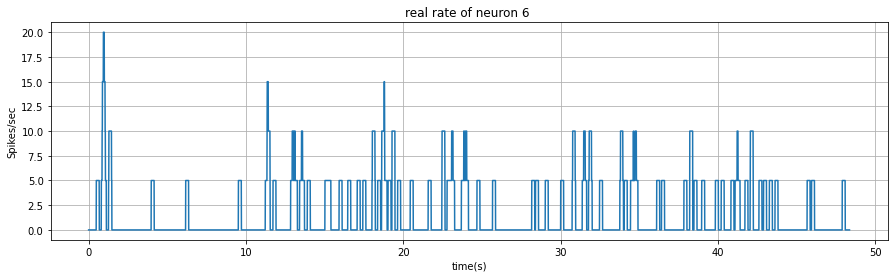

Correlation Number: 0.22534295945019647


(array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        ...,
        [0, 0, 5, 0, 0, 0],
        [0, 0, 5, 0, 0, 0],
        [0, 0, 5, 0, 0, 0]]), 0       1.0
 1       1.0
 2       1.0
 3       1.0
 4       1.0
        ... 
 4831    3.0
 4832    3.0
 4833    3.0
 4834    3.0
 4835    3.0
 Name: seventh, Length: 4836, dtype: float64)

In [ ]:
window_size = 0.2
bin_size = 0.01


Rates1(datasetsdefin, window_size, bin_size, show_plot =True)

In [ ]:
LDA = LinearDiscriminantAnalysis()
SVM = svm.SVC()
KNC = KNeighborsClassifier(n_neighbors=5)

In [ ]:
window_sizes = [0.2, 0.7, 1.0, 1.5, 2.3, 3.9]
bin_size = 0.01

In [ ]:
trainx, testx = [], []
trainy, testy = [], []

optimal_decoder = ['', 0, 0]

In [ ]:
kf = KFold(n_splits=10, random_state=23, shuffle=True)

In [ ]:
print('Decoder: LDA')
for ws in window_sizes:
    (r,c) = Rates1(datasetsdefin, ws, bin_size, show_plot = False)

    cv = KFold(n_splits=10, random_state=23, shuffle=True)
    print('Window Size: ' + str(ws))
    print('Accuracy:')

    for train_index, test_index in kf.split(r):
      trainx, testx = r[train_index], r[test_index]
      trainy, testy = c[train_index], c[test_index]

    LDA.fit(trainx, trainy)
    print(LDA.score(testx, testy))
    if (LDA.score(testx, testy) > optimal_decoder[2]):
      optimal_decoder[0] = 'LDA'
      optimal_decoder[1] = ws
      optimal_decoder[2] = LDA.score(testx, testy)

Decoder: LDA
Window Size: 0.2
Accuracy:
0.4472049689440994
Window Size: 0.7
Accuracy:
0.6045548654244306
Window Size: 1.0
Accuracy:
0.6335403726708074
Window Size: 1.5
Accuracy:
0.629399585921325
Window Size: 2.3
Accuracy:
0.6273291925465838
Window Size: 3.9
Accuracy:
0.6169772256728778


In [ ]:
print('Decoder: SVM')
for ws in window_sizes:
    (r,c) = Rates1(datasetsdefin, ws, bin_size, show_plot = False)

    cv = KFold(n_splits=10, random_state=23, shuffle=True)
    print('Window Size: ' + str(ws))
    print('Accuracy:')

    for train_index, test_index in kf.split(r):
      trainx, testx = r[train_index], r[test_index]
      trainy, testy = c[train_index], c[test_index]

    SVM.fit(trainx, trainy)
    print(SVM.score(testx, testy))
    if (SVM.score(testx, testy) > optimal_decoder[2]):
      optimal_decoder[0] = 'SVM'
      optimal_decoder[1] = ws
      optimal_decoder[2] = SVM.score(testx, testy)

Decoder: SVM
Window Size: 0.2
Accuracy:
0.546583850931677
Window Size: 0.7
Accuracy:
0.7743271221532091
Window Size: 1.0
Accuracy:
0.865424430641822
Window Size: 1.5
Accuracy:
0.8674948240165632
Window Size: 2.3
Accuracy:
0.8343685300207039
Window Size: 3.9
Accuracy:
0.7888198757763976


In [ ]:
print('Decoder: KNC')
for ws in window_sizes:
    (r,c) = Rates1(datasetsdefin, ws, bin_size, show_plot = False)

    cv = KFold(n_splits=10, random_state=23, shuffle=True)
    print('Window Size: ' + str(ws))
    print('Accuracy:')

    for train_index, test_index in kf.split(r):
      trainx, testx = r[train_index], r[test_index]
      trainy, testy = c[train_index], c[test_index]

    KNC.fit(trainx, trainy)
    print(KNC.score(testx, testy))
    if (KNC.score(testx, testy) > optimal_decoder[2]):
      optimal_decoder[0] = 'KNC'
      optimal_decoder[1] = ws
      optimal_decoder[2] = KNC.score(testx, testy)

Decoder: KNC
Window Size: 0.2
Accuracy:
0.5072463768115942
Window Size: 0.7
Accuracy:
0.8488612836438924
Window Size: 1.0
Accuracy:
0.9213250517598344
Window Size: 1.5
Accuracy:
0.8488612836438924
Window Size: 2.3
Accuracy:
0.8074534161490683
Window Size: 3.9
Accuracy:
0.7039337474120083


In [ ]:
print('Best Classifier: ' + str(optimal_decoder[0]))
print('It\'s Best Window Size: ' + str(optimal_decoder[1]))
print('It\'s Best Accuracy: ' + str(optimal_decoder[2]))

Best Classifier: KNC
It's Best Window Size: 1.0
It's Best Accuracy: 0.9213250517598344


In [ ]:
kf = KFold(n_splits=10, random_state=23, shuffle=True)

(r,c) = Rates1(datasetsdefin, 1.0, bin_size, show_plot = False)
print('Decoder: KNC')
for train_index, test_index in kf.split(r):
    trainx, testx = r[train_index], r[test_index]
    trainy, testy = c[train_index], c[test_index]

KNC.fit(trainx, trainy)

predictions = KNC.predict(testx)
print(classification_report(testy, predictions, zero_division=1))

Decoder: KNC
              precision    recall  f1-score   support

         1.0       0.90      0.99      0.94       176
         2.0       0.97      0.97      0.97        89
         3.0       0.91      0.89      0.90       119
         4.0       0.93      0.80      0.86        99

    accuracy                           0.92       483
   macro avg       0.93      0.91      0.92       483
weighted avg       0.92      0.92      0.92       483

